In [10]:
TEST = False
name = 'MRL_arbitrary_dim50_margin'

In [11]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from pykeen.kge_models import Region

import json

In [12]:
%matplotlib inline

In [13]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [14]:
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [15]:
print(time.asctime())

Wed Jul 10 16:55:34 2019


In [16]:
print(pykeen.get_version())

0.0.26-dev


Check which hyper-parameters are required by Region:

In [17]:
Region.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'corrupt_relations',
 'normalization_of_entities',
 'init_radius',
 'reg_lambda',
 'loss_type',
 'neg_factor',
 'region_type']

Define output directory:

In [18]:
today = time.localtime()
output_directory = 'D:/uni/master/models/region_hpo/opt_{}_{}_{}_{}'.format(today.tm_year, today.tm_mon, today.tm_mday, name)
output_directory

'D:/uni/master/models/region_hpo/opt_2019_7_10_MRL_arbitrary_dim50_margin'

Define hyper-parameters inclduing the evaluation information:
 * Define the hyper-parameter optimization mode: **HPO_mode**
 * Define for each hyper-parameter a list of values (single valued lists are possible)
 * Define the number of hyper-parameter optimization iterations: **maximum_number_of_hpo_iters**
 * Define the path to the test set (**test_set_path**) or define the ratio of the training set that should be used as test set (**test_set_ratio**)
 * Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [19]:
config = dict(
    metrics                     = ['mean_rank'],
    training_set_path           = 'D:/uni/master/data/FB15K/train.tsv', 
    test_set_path               = 'D:/uni/master/data/FB15K/valid_150.tsv',
    mapping_path                = 'D:/uni/master/data/fb15k/',
    execution_mode              = 'HPO_mode', # Define hyper-parameter optimization mode
    random_seed                 = 5,
    
    kg_embedding_model_name     = 'Region',
    region_type                 = ['arbitrary'],
    embedding_dim               = [50],
    normalization_of_entities   = [2],
    init_radius                 = 0,
    reg_lambda                  = [0], # [5, 1, 0.1, 0.01, 0],
    loss_type                   = ['MRL'],
    margin_loss                 = [0.1],  # [0.0, 0.02, 0.05, 0.1, 0.2, 0.3],
    
    neg_factor                  = [1],
    corrupt_relations           = [False], # [True, False],
    filter_negative_triples     = False,
    
    es_metric                   = 'custom',
    learning_rate               = [1e-1],
    num_epochs                  = [500] if not TEST else [10],  
    batch_size                  = [2048],
    test_batch_size             = [4096],
    maximum_number_of_hpo_iters = 1, # Define the number HPO iterations
    preferred_device            = 'gpu'
)

config = dict(
    metrics                     = ['mean_rank'],
    training_set_path           = 'D:/uni/master/data/FB15K/train.tsv', 
    test_set_path               = 'D:/uni/master/data/FB15K/valid_150.tsv',
    mapping_path                = 'D:/uni/master/data/fb15k/',
    execution_mode              = 'HPO_mode', # Define hyper-parameter optimization mode
    random_seed                 = 5,
    
    kg_embedding_model_name     = 'Region',
    region_type                 = ['sphere'],
    embedding_dim               = [50],
    normalization_of_entities   = [1,2],
    init_radius                 = 0,
    reg_lambda                  = [100, 10, 1, 0, 0.1, 0.01],
    loss_type                   = ['NLL'],
    margin_loss                 = [0],  # [0.0, 0.02, 0.05, 0.1, 0.2, 0.3],
    
    neg_factor                  = [1, 2, 5],
    corrupt_relations           = [True, False],
    filter_negative_triples     = False,
    
    es_metric                   = 'custom',
    learning_rate               = [1e-1],
    num_epochs                  = [1000] if not TEST else [10],  
    batch_size                  = [2048],
    test_batch_size             = [4096],
    maximum_number_of_hpo_iters = 10, # Define the number HPO iterations
    preferred_device            = 'gpu'
)

Train and evaluate Region:

In [20]:
results = pykeen.run(
    config=config,
    output_directory=output_directory
)

HPO Iteration:   0%|                                                                             | 0/1 [00:00<?, ?it/s]

{'metrics': 'mean_rank', 'training_set_path': 'D:/uni/master/data/FB15K/train.tsv', 'test_set_path': 'D:/uni/master/data/FB15K/valid_150.tsv', 'mapping_path': 'D:/uni/master/data/fb15k/', 'execution_mode': 'HPO_mode', 'random_seed': 5, 'kg_embedding_model_name': 'Region', 'region_type': 'arbitrary', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 0, 'reg_lambda': 0, 'loss_type': 'MRL', 'margin_loss': 0.1, 'neg_factor': 1, 'corrupt_relations': False, 'filter_negative_triples': False, 'es_metric': 'custom', 'learning_rate': 0.1, 'num_epochs': 500, 'batch_size': 2048, 'test_batch_size': 4096, 'maximum_number_of_hpo_iters': 1, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 14951, 'num_relations': 1345}


INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 478.95s seconds


0.09370854979236712 (0.07436031784701051, 0.12666666666666668)


INFO:pykeen.utilities.train_utils:Epoch   0 /  500 (126.1s):  loss: 0.048  val loss: 0.020  value: 0.094  patience:   1
INFO:pykeen.utilities.train_utils:Epoch   1 /  500 (124.6s):  loss: 0.017  val loss: 0.011  value: 0.094  patience:   2
INFO:pykeen.utilities.train_utils:Epoch   2 /  500 (125.1s):  loss: 0.012  val loss: 0.006  value: 0.094  patience:   3
INFO:pykeen.utilities.train_utils:Epoch   3 /  500 (124.7s):  loss: 0.010  val loss: 0.005  value: 0.094  patience:   4
INFO:pykeen.utilities.train_utils:Epoch   4 /  500 (124.8s):  loss: 0.008  val loss: 0.004  value: 0.094  patience:   5
INFO:pykeen.utilities.train_utils:Epoch   5 /  500 (125.3s):  loss: 0.008  val loss: 0.007  value: 0.094  patience:   6
INFO:pykeen.utilities.train_utils:Epoch   6 /  500 (125.2s):  loss: 0.007  val loss: 0.007  value: 0.094  patience:   7
INFO:pykeen.utilities.train_utils:Epoch   7 /  500 (125.2s):  loss: 0.007  val loss: 0.006  value: 0.094  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.1329031057536599 (0.10423168304335696, 0.18333333333333332)


INFO:pykeen.utilities.train_utils:Epoch  10 /  500 (125.7s):  loss: 0.006  val loss: 0.009  value: 0.133  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  11 /  500 (124.7s):  loss: 0.006  val loss: 0.011  value: 0.133  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  12 /  500 (124.7s):  loss: 0.006  val loss: 0.006  value: 0.133  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  13 /  500 (124.7s):  loss: 0.006  val loss: 0.006  value: 0.133  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  14 /  500 (124.6s):  loss: 0.006  val loss: 0.008  value: 0.133  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  15 /  500 (124.7s):  loss: 0.005  val loss: 0.007  value: 0.133  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  16 /  500 (124.6s):  loss: 0.005  val loss: 0.005  value: 0.133  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  17 /  500 (124.7s):  loss: 0.005  val loss: 0.003  value: 0.133  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.15950065419695744 (0.12028220981901953, 0.23666666666666666)


INFO:pykeen.utilities.train_utils:Epoch  20 /  500 (124.6s):  loss: 0.005  val loss: 0.003  value: 0.160  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  21 /  500 (124.7s):  loss: 0.005  val loss: 0.007  value: 0.160  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  22 /  500 (124.6s):  loss: 0.005  val loss: 0.006  value: 0.160  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  23 /  500 (124.7s):  loss: 0.005  val loss: 0.005  value: 0.160  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  24 /  500 (124.7s):  loss: 0.005  val loss: 0.003  value: 0.160  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  25 /  500 (124.7s):  loss: 0.005  val loss: 0.002  value: 0.160  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  26 /  500 (124.6s):  loss: 0.005  val loss: 0.003  value: 0.160  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  27 /  500 (124.7s):  loss: 0.005  val loss: 0.003  value: 0.160  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.1714586788653561 (0.1295798436391568, 0.25333333333333335)


INFO:pykeen.utilities.train_utils:Epoch  30 /  500 (124.6s):  loss: 0.004  val loss: 0.008  value: 0.171  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  31 /  500 (124.7s):  loss: 0.004  val loss: 0.007  value: 0.171  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  32 /  500 (124.7s):  loss: 0.004  val loss: 0.003  value: 0.171  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  33 /  500 (124.7s):  loss: 0.004  val loss: 0.004  value: 0.171  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  34 /  500 (124.7s):  loss: 0.004  val loss: 0.003  value: 0.171  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  35 /  500 (124.7s):  loss: 0.004  val loss: 0.002  value: 0.171  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  36 /  500 (124.7s):  loss: 0.004  val loss: 0.002  value: 0.171  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  37 /  500 (124.7s):  loss: 0.004  val loss: 0.004  value: 0.171  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.17033314093741106 (0.13007889495741723, 0.24666666666666667)


INFO:pykeen.utilities.train_utils:Epoch  40 /  500 (124.7s):  loss: 0.004  val loss: 0.008  value: 0.170  patience:  11
INFO:pykeen.utilities.train_utils:Epoch  41 /  500 (124.7s):  loss: 0.004  val loss: 0.006  value: 0.170  patience:  12
INFO:pykeen.utilities.train_utils:Epoch  42 /  500 (124.7s):  loss: 0.004  val loss: 0.006  value: 0.170  patience:  13
INFO:pykeen.utilities.train_utils:Epoch  43 /  500 (124.7s):  loss: 0.004  val loss: 0.005  value: 0.170  patience:  14
INFO:pykeen.utilities.train_utils:Epoch  44 /  500 (124.7s):  loss: 0.004  val loss: 0.006  value: 0.170  patience:  15
INFO:pykeen.utilities.train_utils:Epoch  45 /  500 (124.7s):  loss: 0.004  val loss: 0.002  value: 0.170  patience:  16
INFO:pykeen.utilities.train_utils:Epoch  46 /  500 (124.7s):  loss: 0.004  val loss: 0.005  value: 0.170  patience:  17
INFO:pykeen.utilities.train_utils:Epoch  47 /  500 (124.7s):  loss: 0.004  val loss: 0.008  value: 0.170  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.16832648918077786 (0.128665649507818, 0.24333333333333335)


INFO:pykeen.utilities.train_utils:Epoch  50 /  500 (124.7s):  loss: 0.004  val loss: 0.009  value: 0.168  patience:  21
INFO:pykeen.utilities.train_utils:Epoch  51 /  500 (124.7s):  loss: 0.004  val loss: 0.007  value: 0.168  patience:  22
INFO:pykeen.utilities.train_utils:Epoch  52 /  500 (124.7s):  loss: 0.004  val loss: 0.006  value: 0.168  patience:  23
INFO:pykeen.utilities.train_utils:Epoch  53 /  500 (124.7s):  loss: 0.004  val loss: 0.005  value: 0.168  patience:  24
INFO:pykeen.utilities.train_utils:Epoch  54 /  500 (124.7s):  loss: 0.004  val loss: 0.005  value: 0.168  patience:  25
INFO:pykeen.utilities.train_utils:Epoch  55 /  500 (124.7s):  loss: 0.004  val loss: 0.006  value: 0.168  patience:  26


Epoch    56: reducing learning rate of group 0 to 1.0000e-02.


INFO:pykeen.utilities.train_utils:Epoch  56 /  500 (124.7s):  loss: 0.004  val loss: 0.004  value: 0.168  patience:  27
INFO:pykeen.utilities.train_utils:Epoch  57 /  500 (124.7s):  loss: 0.003  val loss: 0.004  value: 0.168  patience:  28
INFO:pykeen.utilities.train_utils:Epoch  58 /  500 (124.7s):  loss: 0.003  val loss: 0.004  value: 0.168  patience:  29
INFO:pykeen.utilities.train_utils:Epoch  59 /  500 (124.7s):  loss: 0.003  val loss: 0.004  value: 0.168  patience:  30
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 478.72s seconds


0.19107536775237652 (0.15218453214863853, 0.25666666666666665)


INFO:pykeen.utilities.train_utils:Epoch  60 /  500 (125.4s):  loss: 0.003  val loss: 0.004  value: 0.191  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  61 /  500 (124.6s):  loss: 0.003  val loss: 0.004  value: 0.191  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  62 /  500 (124.6s):  loss: 0.003  val loss: 0.004  value: 0.191  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  63 /  500 (124.7s):  loss: 0.003  val loss: 0.004  value: 0.191  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  64 /  500 (124.8s):  loss: 0.003  val loss: 0.004  value: 0.191  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  65 /  500 (124.8s):  loss: 0.003  val loss: 0.005  value: 0.191  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  66 /  500 (124.8s):  loss: 0.003  val loss: 0.005  value: 0.191  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  67 /  500 (124.8s):  loss: 0.003  val loss: 0.005  value: 0.191  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.20071978963301282 (0.16092332452852703, 0.26666666666666666)


INFO:pykeen.utilities.train_utils:Epoch  70 /  500 (124.8s):  loss: 0.003  val loss: 0.005  value: 0.201  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  71 /  500 (124.8s):  loss: 0.003  val loss: 0.005  value: 0.201  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  72 /  500 (124.8s):  loss: 0.003  val loss: 0.004  value: 0.201  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  73 /  500 (124.8s):  loss: 0.003  val loss: 0.005  value: 0.201  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  74 /  500 (124.7s):  loss: 0.003  val loss: 0.004  value: 0.201  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  75 /  500 (124.8s):  loss: 0.003  val loss: 0.005  value: 0.201  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  76 /  500 (124.8s):  loss: 0.003  val loss: 0.005  value: 0.201  patience:   7


Epoch    77: reducing learning rate of group 0 to 1.0000e-03.


INFO:pykeen.utilities.train_utils:Epoch  77 /  500 (124.8s):  loss: 0.003  val loss: 0.005  value: 0.201  patience:   8
INFO:pykeen.utilities.train_utils:Epoch  78 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.201  patience:   9
INFO:pykeen.utilities.train_utils:Epoch  79 /  500 (124.8s):  loss: 0.002  val loss: 0.005  value: 0.201  patience:  10
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 479.22s seconds


0.20293034746345764 (0.1637841110337332, 0.26666666666666666)


INFO:pykeen.utilities.train_utils:Epoch  80 /  500 (124.8s):  loss: 0.002  val loss: 0.005  value: 0.203  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  81 /  500 (124.8s):  loss: 0.002  val loss: 0.005  value: 0.203  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  82 /  500 (124.8s):  loss: 0.002  val loss: 0.005  value: 0.203  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  83 /  500 (124.7s):  loss: 0.003  val loss: 0.005  value: 0.203  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  84 /  500 (124.8s):  loss: 0.002  val loss: 0.005  value: 0.203  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  85 /  500 (124.8s):  loss: 0.002  val loss: 0.005  value: 0.203  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  86 /  500 (124.8s):  loss: 0.002  val loss: 0.005  value: 0.203  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  87 /  500 (124.8s):  loss: 0.002  val loss: 0.005  value: 0.203  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.20480648863059564 (0.16375244565568978, 0.2733333333333333)


INFO:pykeen.utilities.train_utils:Epoch  90 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  91 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  92 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  93 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  94 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  95 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  96 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  97 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.20219333282596025 (0.1593101194234569, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch 100 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 101 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 102 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 103 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 104 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 105 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 106 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 107 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.20371644739201122 (0.15902913686001924, 0.2833333333333333)


INFO:pykeen.utilities.train_utils:Epoch 110 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.204  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 111 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.204  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 112 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.204  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 113 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.204  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 114 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.204  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 115 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.204  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 116 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.204  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 117 /  500 (124.9s):  loss: 0.002  val loss: 0.005  value: 0.204  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 

0.20154902816409215 (0.15962692587146404, 0.2733333333333333)


INFO:pykeen.utilities.train_utils:Epoch 120 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 121 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 122 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  33
INFO:pykeen.utilities.train_utils:Epoch 123 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  34
INFO:pykeen.utilities.train_utils:Epoch 124 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 125 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 126 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 127 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 

0.20515221400277567 (0.16078599404755026, 0.2833333333333333)


INFO:pykeen.utilities.train_utils:Epoch 130 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 131 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 132 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 133 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 134 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 135 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 136 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 137 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.20792759498292848 (0.16206254947147347, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 140 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.208  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 141 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.208  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 142 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.208  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 143 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.208  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 144 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.208  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 145 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.208  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 146 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.208  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 147 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.208  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.20909903297909746 (0.1645691323662955, 0.2866666666666667)


INFO:pykeen.utilities.train_utils:Epoch 150 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.209  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 151 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.209  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 152 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.209  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 153 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.209  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 154 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.209  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 155 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.209  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 156 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.209  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 157 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.209  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.20676577387742218 (0.1606553478425091, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 160 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.207  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 161 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.207  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 162 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.207  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 163 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.207  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 164 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.207  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 165 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.207  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 166 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.207  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 167 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.207  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.20461096201577839 (0.15907671193079723, 0.2866666666666667)


INFO:pykeen.utilities.train_utils:Epoch 170 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 171 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 172 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 173 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 174 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 175 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 176 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 177 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 

0.20499369977660462 (0.1595398790925282, 0.2866666666666667)


INFO:pykeen.utilities.train_utils:Epoch 180 /  500 (124.7s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 181 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 182 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  33
INFO:pykeen.utilities.train_utils:Epoch 183 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  34
INFO:pykeen.utilities.train_utils:Epoch 184 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 185 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 186 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 187 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 

0.2052864031007138 (0.15887615872985794, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 190 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  41
INFO:pykeen.utilities.train_utils:Epoch 191 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  42
INFO:pykeen.utilities.train_utils:Epoch 192 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  43
INFO:pykeen.utilities.train_utils:Epoch 193 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  44
INFO:pykeen.utilities.train_utils:Epoch 194 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  45
INFO:pykeen.utilities.train_utils:Epoch 195 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  46
INFO:pykeen.utilities.train_utils:Epoch 196 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  47
INFO:pykeen.utilities.train_utils:Epoch 197 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  48
INFO:pykeen.utilities.train_utils:Epoch 

0.2100326780386571 (0.16463474749149565, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 200 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.210  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 201 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.210  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 202 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.210  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 203 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.210  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 204 /  500 (124.7s):  loss: 0.002  val loss: 0.004  value: 0.210  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 205 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.210  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 206 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.210  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 207 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.210  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.20479184163964392 (0.15828449555848398, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 210 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 211 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 212 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 213 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 214 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 215 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 216 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 217 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.2024787903691123 (0.1555378816052574, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 220 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 221 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 222 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 223 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 224 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 225 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 226 /  500 (125.2s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 227 /  500 (125.0s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 

0.20415374497740157 (0.15752341616357649, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 230 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.204  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 231 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.204  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 232 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.204  patience:  33
INFO:pykeen.utilities.train_utils:Epoch 233 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.204  patience:  34
INFO:pykeen.utilities.train_utils:Epoch 234 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.204  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 235 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.204  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 236 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.204  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 237 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.204  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 

0.2025569591834453 (0.15563015292617027, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 240 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.203  patience:  41
INFO:pykeen.utilities.train_utils:Epoch 241 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.203  patience:  42
INFO:pykeen.utilities.train_utils:Epoch 242 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.203  patience:  43
INFO:pykeen.utilities.train_utils:Epoch 243 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.203  patience:  44
INFO:pykeen.utilities.train_utils:Epoch 244 /  500 (124.7s):  loss: 0.002  val loss: 0.004  value: 0.203  patience:  45
INFO:pykeen.utilities.train_utils:Epoch 245 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.203  patience:  46
INFO:pykeen.utilities.train_utils:Epoch 246 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.203  patience:  47
INFO:pykeen.utilities.train_utils:Epoch 247 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.203  patience:  48
INFO:pykeen.utilities.train_utils:Epoch 

0.20217916372778988 (0.15518455270904183, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 250 /  500 (124.7s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  51
INFO:pykeen.utilities.train_utils:Epoch 251 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  52
INFO:pykeen.utilities.train_utils:Epoch 252 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  53
INFO:pykeen.utilities.train_utils:Epoch 253 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  54
INFO:pykeen.utilities.train_utils:Epoch 254 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  55
INFO:pykeen.utilities.train_utils:Epoch 255 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  56
INFO:pykeen.utilities.train_utils:Epoch 256 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  57
INFO:pykeen.utilities.train_utils:Epoch 257 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  58
INFO:pykeen.utilities.train_utils:Epoch 

0.19985219941804616 (0.1533972097400988, 0.2866666666666667)


INFO:pykeen.utilities.train_utils:Epoch 260 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.200  patience:  61
INFO:pykeen.utilities.train_utils:Epoch 261 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.200  patience:  62
INFO:pykeen.utilities.train_utils:Epoch 262 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.200  patience:  63
INFO:pykeen.utilities.train_utils:Epoch 263 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.200  patience:  64
INFO:pykeen.utilities.train_utils:Epoch 264 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.200  patience:  65
INFO:pykeen.utilities.train_utils:Epoch 265 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.200  patience:  66
INFO:pykeen.utilities.train_utils:Epoch 266 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.200  patience:  67
INFO:pykeen.utilities.train_utils:Epoch 267 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.200  patience:  68
INFO:pykeen.utilities.train_utils:Epoch 

0.20143508276900943 (0.15527022146378297, 0.2866666666666667)


INFO:pykeen.utilities.train_utils:Epoch 270 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.201  patience:  71
INFO:pykeen.utilities.train_utils:Epoch 271 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.201  patience:  72
INFO:pykeen.utilities.train_utils:Epoch 272 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.201  patience:  73
INFO:pykeen.utilities.train_utils:Epoch 273 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.201  patience:  74
INFO:pykeen.utilities.train_utils:Epoch 274 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.201  patience:  75
INFO:pykeen.utilities.train_utils:Epoch 275 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.201  patience:  76
INFO:pykeen.utilities.train_utils:Epoch 276 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.201  patience:  77
INFO:pykeen.utilities.train_utils:Epoch 277 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.201  patience:  78
INFO:pykeen.utilities.train_utils:Epoch 

0.20476425283071079 (0.15926210015072803, 0.2866666666666667)


INFO:pykeen.utilities.train_utils:Epoch 280 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  81
INFO:pykeen.utilities.train_utils:Epoch 281 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.205  patience:  82
INFO:pykeen.utilities.train_utils:Epoch 282 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  83
INFO:pykeen.utilities.train_utils:Epoch 283 /  500 (124.7s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  84
INFO:pykeen.utilities.train_utils:Epoch 284 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  85
INFO:pykeen.utilities.train_utils:Epoch 285 /  500 (124.7s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  86
INFO:pykeen.utilities.train_utils:Epoch 286 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  87
INFO:pykeen.utilities.train_utils:Epoch 287 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.205  patience:  88
INFO:pykeen.utilities.train_utils:Epoch 

0.20182739846008543 (0.15573691326976458, 0.2866666666666667)


INFO:pykeen.utilities.train_utils:Epoch 290 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  91
INFO:pykeen.utilities.train_utils:Epoch 291 /  500 (124.6s):  loss: 0.002  val loss: 0.004  value: 0.202  patience:  92
INFO:pykeen.utilities.train_utils:Epoch 292 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  93
INFO:pykeen.utilities.train_utils:Epoch 293 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  94
INFO:pykeen.utilities.train_utils:Epoch 294 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  95
INFO:pykeen.utilities.train_utils:Epoch 295 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  96
INFO:pykeen.utilities.train_utils:Epoch 296 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  97
INFO:pykeen.utilities.train_utils:Epoch 297 /  500 (124.6s):  loss: 0.002  val loss: 0.005  value: 0.202  patience:  98
INFO:pykeen.utilities.train_utils:Epoch 

MetricResults(mean_rank=0.16463474749149565, hits_at_k={1: 0.1, 3: 0.17333333333333334, 5: 0.20666666666666667, 10: 0.29}, precision=None, recall=None, accuracy=None, fscore=None)


HPO Iteration: 100%|███████████████████████████████████████████████████████████████| 1/1 [14:31:04<00:00, 52264.11s/it]


In [21]:
config['margin_loss'] = [0.3]
results30 = pykeen.run(
    config=config,
    output_directory=output_directory
)

HPO Iteration:   0%|                                                                             | 0/1 [00:00<?, ?it/s]

{'metrics': 'mean_rank', 'training_set_path': 'D:/uni/master/data/FB15K/train.tsv', 'test_set_path': 'D:/uni/master/data/FB15K/valid_150.tsv', 'mapping_path': 'D:/uni/master/data/fb15k/', 'execution_mode': 'HPO_mode', 'random_seed': 5, 'kg_embedding_model_name': 'Region', 'region_type': 'arbitrary', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 0, 'reg_lambda': 0, 'loss_type': 'MRL', 'margin_loss': 0.3, 'neg_factor': 1, 'corrupt_relations': False, 'filter_negative_triples': False, 'es_metric': 'custom', 'learning_rate': 0.1, 'num_epochs': 500, 'batch_size': 2048, 'test_batch_size': 4096, 'maximum_number_of_hpo_iters': 1, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 14951, 'num_relations': 1345}


INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 478.94s seconds


0.12184347030636958 (0.10108398629009965, 0.15333333333333332)


INFO:pykeen.utilities.train_utils:Epoch   0 /  500 (124.3s):  loss: 0.108  val loss: 0.049  value: 0.122  patience:   1
INFO:pykeen.utilities.train_utils:Epoch   1 /  500 (124.6s):  loss: 0.046  val loss: 0.038  value: 0.122  patience:   2
INFO:pykeen.utilities.train_utils:Epoch   2 /  500 (124.6s):  loss: 0.036  val loss: 0.023  value: 0.122  patience:   3
INFO:pykeen.utilities.train_utils:Epoch   3 /  500 (124.6s):  loss: 0.033  val loss: 0.018  value: 0.122  patience:   4
INFO:pykeen.utilities.train_utils:Epoch   4 /  500 (124.6s):  loss: 0.031  val loss: 0.016  value: 0.122  patience:   5
INFO:pykeen.utilities.train_utils:Epoch   5 /  500 (124.6s):  loss: 0.027  val loss: 0.023  value: 0.122  patience:   6
INFO:pykeen.utilities.train_utils:Epoch   6 /  500 (124.6s):  loss: 0.024  val loss: 0.025  value: 0.122  patience:   7
INFO:pykeen.utilities.train_utils:Epoch   7 /  500 (124.6s):  loss: 0.021  val loss: 0.023  value: 0.122  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.154794135379518 (0.119403960464873, 0.22)


INFO:pykeen.utilities.train_utils:Epoch  10 /  500 (124.6s):  loss: 0.019  val loss: 0.027  value: 0.155  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  11 /  500 (124.6s):  loss: 0.019  val loss: 0.026  value: 0.155  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  12 /  500 (124.6s):  loss: 0.018  val loss: 0.025  value: 0.155  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  13 /  500 (124.6s):  loss: 0.018  val loss: 0.025  value: 0.155  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  14 /  500 (124.6s):  loss: 0.018  val loss: 0.030  value: 0.155  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  15 /  500 (124.6s):  loss: 0.017  val loss: 0.026  value: 0.155  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  16 /  500 (124.6s):  loss: 0.017  val loss: 0.017  value: 0.155  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  17 /  500 (124.6s):  loss: 0.017  val loss: 0.020  value: 0.155  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.16016233572389565 (0.12944270645181907, 0.21)


INFO:pykeen.utilities.train_utils:Epoch  20 /  500 (124.6s):  loss: 0.016  val loss: 0.010  value: 0.160  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  21 /  500 (124.6s):  loss: 0.016  val loss: 0.016  value: 0.160  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  22 /  500 (124.6s):  loss: 0.016  val loss: 0.018  value: 0.160  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  23 /  500 (124.6s):  loss: 0.016  val loss: 0.009  value: 0.160  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  24 /  500 (124.6s):  loss: 0.016  val loss: 0.014  value: 0.160  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  25 /  500 (124.6s):  loss: 0.016  val loss: 0.009  value: 0.160  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  26 /  500 (124.6s):  loss: 0.016  val loss: 0.015  value: 0.160  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  27 /  500 (124.7s):  loss: 0.016  val loss: 0.024  value: 0.160  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.15143409419708032 (0.1136970780368434, 0.22666666666666666)


INFO:pykeen.utilities.train_utils:Epoch  30 /  500 (124.7s):  loss: 0.015  val loss: 0.024  value: 0.151  patience:  11
INFO:pykeen.utilities.train_utils:Epoch  31 /  500 (124.6s):  loss: 0.015  val loss: 0.024  value: 0.151  patience:  12
INFO:pykeen.utilities.train_utils:Epoch  32 /  500 (124.6s):  loss: 0.015  val loss: 0.026  value: 0.151  patience:  13
INFO:pykeen.utilities.train_utils:Epoch  33 /  500 (124.6s):  loss: 0.015  val loss: 0.015  value: 0.151  patience:  14
INFO:pykeen.utilities.train_utils:Epoch  34 /  500 (124.6s):  loss: 0.015  val loss: 0.017  value: 0.151  patience:  15
INFO:pykeen.utilities.train_utils:Epoch  35 /  500 (124.6s):  loss: 0.015  val loss: 0.011  value: 0.151  patience:  16
INFO:pykeen.utilities.train_utils:Epoch  36 /  500 (124.6s):  loss: 0.015  val loss: 0.023  value: 0.151  patience:  17
INFO:pykeen.utilities.train_utils:Epoch  37 /  500 (124.6s):  loss: 0.015  val loss: 0.023  value: 0.151  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.17534497552107267 (0.14044209156103002, 0.23333333333333334)


INFO:pykeen.utilities.train_utils:Epoch  40 /  500 (124.6s):  loss: 0.014  val loss: 0.011  value: 0.175  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  41 /  500 (124.6s):  loss: 0.015  val loss: 0.015  value: 0.175  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  42 /  500 (124.6s):  loss: 0.015  val loss: 0.016  value: 0.175  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  43 /  500 (124.7s):  loss: 0.014  val loss: 0.014  value: 0.175  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  44 /  500 (124.6s):  loss: 0.014  val loss: 0.013  value: 0.175  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  45 /  500 (124.6s):  loss: 0.014  val loss: 0.013  value: 0.175  patience:   6


Epoch    46: reducing learning rate of group 0 to 1.0000e-02.


INFO:pykeen.utilities.train_utils:Epoch  46 /  500 (124.6s):  loss: 0.014  val loss: 0.020  value: 0.175  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  47 /  500 (124.6s):  loss: 0.012  val loss: 0.018  value: 0.175  patience:   8
INFO:pykeen.utilities.train_utils:Epoch  48 /  500 (124.6s):  loss: 0.011  val loss: 0.016  value: 0.175  patience:   9
INFO:pykeen.utilities.train_utils:Epoch  49 /  500 (124.6s):  loss: 0.010  val loss: 0.015  value: 0.175  patience:  10
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 479.22s seconds


0.17713834957103575 (0.1371627362181945, 0.25)


INFO:pykeen.utilities.train_utils:Epoch  50 /  500 (124.7s):  loss: 0.010  val loss: 0.015  value: 0.177  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  51 /  500 (124.6s):  loss: 0.009  val loss: 0.014  value: 0.177  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  52 /  500 (124.6s):  loss: 0.009  val loss: 0.012  value: 0.177  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  53 /  500 (124.6s):  loss: 0.009  val loss: 0.013  value: 0.177  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  54 /  500 (124.6s):  loss: 0.009  val loss: 0.012  value: 0.177  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  55 /  500 (124.6s):  loss: 0.009  val loss: 0.013  value: 0.177  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  56 /  500 (124.6s):  loss: 0.008  val loss: 0.012  value: 0.177  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  57 /  500 (124.6s):  loss: 0.008  val loss: 0.010  value: 0.177  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.2008171927280734 (0.15009148064108505, 0.30333333333333334)


INFO:pykeen.utilities.train_utils:Epoch  60 /  500 (124.6s):  loss: 0.008  val loss: 0.012  value: 0.201  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  61 /  500 (124.6s):  loss: 0.008  val loss: 0.012  value: 0.201  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  62 /  500 (124.7s):  loss: 0.008  val loss: 0.013  value: 0.201  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  63 /  500 (124.7s):  loss: 0.008  val loss: 0.014  value: 0.201  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  64 /  500 (124.9s):  loss: 0.008  val loss: 0.013  value: 0.201  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  65 /  500 (124.7s):  loss: 0.008  val loss: 0.012  value: 0.201  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  66 /  500 (124.9s):  loss: 0.008  val loss: 0.010  value: 0.201  patience:   7


Epoch    67: reducing learning rate of group 0 to 1.0000e-03.


INFO:pykeen.utilities.train_utils:Epoch  67 /  500 (124.7s):  loss: 0.008  val loss: 0.011  value: 0.201  patience:   8
INFO:pykeen.utilities.train_utils:Epoch  68 /  500 (124.6s):  loss: 0.008  val loss: 0.012  value: 0.201  patience:   9
INFO:pykeen.utilities.train_utils:Epoch  69 /  500 (124.6s):  loss: 0.007  val loss: 0.012  value: 0.201  patience:  10
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 479.22s seconds


0.21287610336008503 (0.1603272848187578, 0.31666666666666665)


INFO:pykeen.utilities.train_utils:Epoch  70 /  500 (124.6s):  loss: 0.007  val loss: 0.012  value: 0.213  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  71 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.213  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  72 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.213  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  73 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.213  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  74 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.213  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  75 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.213  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  76 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.213  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  77 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.213  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.21722508028148693 (0.16531261176539716, 0.31666666666666665)


INFO:pykeen.utilities.train_utils:Epoch  80 /  500 (124.7s):  loss: 0.007  val loss: 0.011  value: 0.217  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  81 /  500 (124.8s):  loss: 0.007  val loss: 0.010  value: 0.217  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  82 /  500 (127.2s):  loss: 0.007  val loss: 0.010  value: 0.217  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  83 /  500 (128.0s):  loss: 0.007  val loss: 0.010  value: 0.217  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  84 /  500 (128.7s):  loss: 0.007  val loss: 0.010  value: 0.217  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  85 /  500 (128.9s):  loss: 0.007  val loss: 0.010  value: 0.217  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  86 /  500 (127.7s):  loss: 0.007  val loss: 0.010  value: 0.217  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  87 /  500 (127.6s):  loss: 0.007  val loss: 0.010  value: 0.217  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.2108477185344321 (0.1572198793878058, 0.32)


INFO:pykeen.utilities.train_utils:Epoch  90 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.211  patience:  11
INFO:pykeen.utilities.train_utils:Epoch  91 /  500 (124.8s):  loss: 0.007  val loss: 0.011  value: 0.211  patience:  12
INFO:pykeen.utilities.train_utils:Epoch  92 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.211  patience:  13
INFO:pykeen.utilities.train_utils:Epoch  93 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.211  patience:  14
INFO:pykeen.utilities.train_utils:Epoch  94 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.211  patience:  15
INFO:pykeen.utilities.train_utils:Epoch  95 /  500 (124.7s):  loss: 0.007  val loss: 0.010  value: 0.211  patience:  16
INFO:pykeen.utilities.train_utils:Epoch  96 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.211  patience:  17
INFO:pykeen.utilities.train_utils:Epoch  97 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.211  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.21415872081681234 (0.1617868216100143, 0.31666666666666665)


INFO:pykeen.utilities.train_utils:Epoch 100 /  500 (124.5s):  loss: 0.007  val loss: 0.011  value: 0.214  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 101 /  500 (124.6s):  loss: 0.007  val loss: 0.011  value: 0.214  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 102 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 103 /  500 (124.7s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 104 /  500 (124.7s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 105 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 106 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 107 /  500 (124.7s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 

0.21364705301899067 (0.16298783342890916, 0.31)


INFO:pykeen.utilities.train_utils:Epoch 110 /  500 (124.6s):  loss: 0.007  val loss: 0.009  value: 0.214  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 111 /  500 (124.9s):  loss: 0.007  val loss: 0.009  value: 0.214  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 112 /  500 (124.6s):  loss: 0.007  val loss: 0.009  value: 0.214  patience:  33
INFO:pykeen.utilities.train_utils:Epoch 113 /  500 (124.8s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  34
INFO:pykeen.utilities.train_utils:Epoch 114 /  500 (124.7s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 115 /  500 (124.9s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 116 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 117 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.214  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 

0.22327904404165594 (0.1705140956314864, 0.3233333333333333)


INFO:pykeen.utilities.train_utils:Epoch 120 /  500 (124.9s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 121 /  500 (125.0s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 122 /  500 (124.9s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 123 /  500 (124.8s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 124 /  500 (124.7s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 125 /  500 (124.6s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 126 /  500 (124.7s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 127 /  500 (124.7s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.21849637208479522 (0.1677294930457927, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 130 /  500 (124.7s):  loss: 0.007  val loss: 0.010  value: 0.218  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 131 /  500 (125.7s):  loss: 0.007  val loss: 0.011  value: 0.218  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 132 /  500 (125.0s):  loss: 0.007  val loss: 0.011  value: 0.218  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 133 /  500 (124.9s):  loss: 0.007  val loss: 0.010  value: 0.218  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 134 /  500 (124.9s):  loss: 0.007  val loss: 0.010  value: 0.218  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 135 /  500 (124.8s):  loss: 0.007  val loss: 0.010  value: 0.218  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 136 /  500 (124.9s):  loss: 0.007  val loss: 0.010  value: 0.218  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 137 /  500 (127.9s):  loss: 0.007  val loss: 0.010  value: 0.218  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.21972130500393625 (0.16917752452058119, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 140 /  500 (124.7s):  loss: 0.007  val loss: 0.009  value: 0.220  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 141 /  500 (125.1s):  loss: 0.007  val loss: 0.009  value: 0.220  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 142 /  500 (124.8s):  loss: 0.007  val loss: 0.009  value: 0.220  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 143 /  500 (125.4s):  loss: 0.007  val loss: 0.009  value: 0.220  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 144 /  500 (125.1s):  loss: 0.007  val loss: 0.009  value: 0.220  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 145 /  500 (125.0s):  loss: 0.007  val loss: 0.009  value: 0.220  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 146 /  500 (124.9s):  loss: 0.007  val loss: 0.009  value: 0.220  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 147 /  500 (125.0s):  loss: 0.007  val loss: 0.009  value: 0.220  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 

0.22274295041025807 (0.1727870593373216, 0.31333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 150 /  500 (125.6s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 151 /  500 (125.1s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 152 /  500 (124.9s):  loss: 0.007  val loss: 0.010  value: 0.223  patience:  33


Model training failed.


HPO Iteration: 100%|████████████████████████████████████████████████████████████████| 1/1 [7:27:10<00:00, 26830.02s/it]


ValueError: attempt to get argmax of an empty sequence

In [ ]:
config['margin_loss'] = [0.5]
results30 = pykeen.run(
    config=config,
    output_directory=output_directory+'05'
)

HPO Iteration:   0%|                                                                             | 0/1 [00:00<?, ?it/s]

{'metrics': 'mean_rank', 'training_set_path': 'D:/uni/master/data/FB15K/train.tsv', 'test_set_path': 'D:/uni/master/data/FB15K/valid_150.tsv', 'mapping_path': 'D:/uni/master/data/fb15k/', 'execution_mode': 'HPO_mode', 'random_seed': 5, 'kg_embedding_model_name': 'Region', 'region_type': 'arbitrary', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 0, 'reg_lambda': 0, 'loss_type': 'MRL', 'margin_loss': 0.5, 'neg_factor': 1, 'corrupt_relations': False, 'filter_negative_triples': False, 'es_metric': 'custom', 'learning_rate': 0.1, 'num_epochs': 500, 'batch_size': 2048, 'test_batch_size': 4096, 'maximum_number_of_hpo_iters': 1, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 14951, 'num_relations': 1345}


INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 480.73s seconds


0.12605881667754562 (0.09605165857470972, 0.18333333333333332)


INFO:pykeen.utilities.train_utils:Epoch   0 /  500 (125.9s):  loss: 0.189  val loss: 0.103  value: 0.126  patience:   1
INFO:pykeen.utilities.train_utils:Epoch   1 /  500 (125.1s):  loss: 0.094  val loss: 0.066  value: 0.126  patience:   2
INFO:pykeen.utilities.train_utils:Epoch   2 /  500 (125.2s):  loss: 0.076  val loss: 0.059  value: 0.126  patience:   3
INFO:pykeen.utilities.train_utils:Epoch   3 /  500 (125.3s):  loss: 0.076  val loss: 0.070  value: 0.126  patience:   4
INFO:pykeen.utilities.train_utils:Epoch   4 /  500 (125.1s):  loss: 0.070  val loss: 0.028  value: 0.126  patience:   5
INFO:pykeen.utilities.train_utils:Epoch   5 /  500 (125.2s):  loss: 0.063  val loss: 0.043  value: 0.126  patience:   6
INFO:pykeen.utilities.train_utils:Epoch   6 /  500 (124.8s):  loss: 0.071  val loss: 0.061  value: 0.126  patience:   7
INFO:pykeen.utilities.train_utils:Epoch   7 /  500 (125.1s):  loss: 0.069  val loss: 0.059  value: 0.126  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.1387436348743807 (0.10926671556377933, 0.19)


INFO:pykeen.utilities.train_utils:Epoch  10 /  500 (125.1s):  loss: 0.054  val loss: 0.062  value: 0.139  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  11 /  500 (125.4s):  loss: 0.059  val loss: 0.069  value: 0.139  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  12 /  500 (124.8s):  loss: 0.052  val loss: 0.063  value: 0.139  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  13 /  500 (124.9s):  loss: 0.051  val loss: 0.053  value: 0.139  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  14 /  500 (124.8s):  loss: 0.049  val loss: 0.054  value: 0.139  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  15 /  500 (125.0s):  loss: 0.051  val loss: 0.069  value: 0.139  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  16 /  500 (125.1s):  loss: 0.053  val loss: 0.074  value: 0.139  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  17 /  500 (125.3s):  loss: 0.052  val loss: 0.050  value: 0.139  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.15778974792268102 (0.1276098603099381, 0.20666666666666667)


INFO:pykeen.utilities.train_utils:Epoch  20 /  500 (124.8s):  loss: 0.057  val loss: 0.073  value: 0.158  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  21 /  500 (126.7s):  loss: 0.053  val loss: 0.037  value: 0.158  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  22 /  500 (126.8s):  loss: 0.049  val loss: 0.054  value: 0.158  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  23 /  500 (126.8s):  loss: 0.053  val loss: 0.053  value: 0.158  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  24 /  500 (127.6s):  loss: 0.047  val loss: 0.044  value: 0.158  patience:   5


Epoch    25: reducing learning rate of group 0 to 1.0000e-02.


INFO:pykeen.utilities.train_utils:Epoch  25 /  500 (126.9s):  loss: 0.039  val loss: 0.034  value: 0.158  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  26 /  500 (127.0s):  loss: 0.027  val loss: 0.031  value: 0.158  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  27 /  500 (127.0s):  loss: 0.025  val loss: 0.028  value: 0.158  patience:   8
INFO:pykeen.utilities.train_utils:Epoch  28 /  500 (127.2s):  loss: 0.023  val loss: 0.022  value: 0.158  patience:   9
INFO:pykeen.utilities.train_utils:Epoch  29 /  500 (127.1s):  loss: 0.022  val loss: 0.020  value: 0.158  patience:  10
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 486.46s seconds


0.1702411416362095 (0.13754345452684807, 0.22333333333333333)


INFO:pykeen.utilities.train_utils:Epoch  30 /  500 (127.0s):  loss: 0.021  val loss: 0.026  value: 0.170  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  31 /  500 (126.9s):  loss: 0.021  val loss: 0.024  value: 0.170  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  32 /  500 (127.0s):  loss: 0.020  val loss: 0.018  value: 0.170  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  33 /  500 (127.1s):  loss: 0.020  val loss: 0.016  value: 0.170  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  34 /  500 (126.9s):  loss: 0.019  val loss: 0.024  value: 0.170  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  35 /  500 (127.0s):  loss: 0.019  val loss: 0.016  value: 0.170  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  36 /  500 (126.9s):  loss: 0.018  val loss: 0.018  value: 0.170  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  37 /  500 (126.9s):  loss: 0.018  val loss: 0.021  value: 0.170  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.18062865785407078 (0.14361932879413056, 0.24333333333333335)


INFO:pykeen.utilities.train_utils:Epoch  40 /  500 (124.7s):  loss: 0.018  val loss: 0.013  value: 0.181  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  41 /  500 (124.7s):  loss: 0.017  val loss: 0.014  value: 0.181  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  42 /  500 (124.8s):  loss: 0.017  val loss: 0.016  value: 0.181  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  43 /  500 (125.0s):  loss: 0.017  val loss: 0.012  value: 0.181  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  44 /  500 (125.0s):  loss: 0.017  val loss: 0.015  value: 0.181  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  45 /  500 (124.7s):  loss: 0.017  val loss: 0.011  value: 0.181  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  46 /  500 (124.7s):  loss: 0.017  val loss: 0.014  value: 0.181  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  47 /  500 (124.7s):  loss: 0.016  val loss: 0.017  value: 0.181  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.18851160747939066 (0.1512990628269703, 0.25)


INFO:pykeen.utilities.train_utils:Epoch  50 /  500 (124.6s):  loss: 0.016  val loss: 0.018  value: 0.189  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  51 /  500 (125.0s):  loss: 0.016  val loss: 0.020  value: 0.189  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  52 /  500 (125.1s):  loss: 0.016  val loss: 0.015  value: 0.189  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  53 /  500 (125.4s):  loss: 0.016  val loss: 0.017  value: 0.189  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  54 /  500 (125.6s):  loss: 0.015  val loss: 0.014  value: 0.189  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  55 /  500 (125.0s):  loss: 0.015  val loss: 0.018  value: 0.189  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  56 /  500 (124.7s):  loss: 0.015  val loss: 0.022  value: 0.189  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  57 /  500 (124.7s):  loss: 0.015  val loss: 0.014  value: 0.189  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.19262357706856367 (0.14681018762399917, 0.28)


INFO:pykeen.utilities.train_utils:Epoch  60 /  500 (124.6s):  loss: 0.015  val loss: 0.017  value: 0.193  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  61 /  500 (124.6s):  loss: 0.015  val loss: 0.024  value: 0.193  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  62 /  500 (124.6s):  loss: 0.015  val loss: 0.016  value: 0.193  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  63 /  500 (124.6s):  loss: 0.015  val loss: 0.014  value: 0.193  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  64 /  500 (124.6s):  loss: 0.015  val loss: 0.017  value: 0.193  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  65 /  500 (124.6s):  loss: 0.015  val loss: 0.016  value: 0.193  patience:   6


Epoch    66: reducing learning rate of group 0 to 1.0000e-03.


INFO:pykeen.utilities.train_utils:Epoch  66 /  500 (124.6s):  loss: 0.015  val loss: 0.020  value: 0.193  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  67 /  500 (124.6s):  loss: 0.014  val loss: 0.017  value: 0.193  patience:   8
INFO:pykeen.utilities.train_utils:Epoch  68 /  500 (124.6s):  loss: 0.014  val loss: 0.017  value: 0.193  patience:   9
INFO:pykeen.utilities.train_utils:Epoch  69 /  500 (124.7s):  loss: 0.014  val loss: 0.017  value: 0.193  patience:  10
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 479.28s seconds


0.19840143165284166 (0.15465237837848372, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch  70 /  500 (124.8s):  loss: 0.014  val loss: 0.017  value: 0.198  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  71 /  500 (124.6s):  loss: 0.014  val loss: 0.016  value: 0.198  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  72 /  500 (124.6s):  loss: 0.014  val loss: 0.017  value: 0.198  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  73 /  500 (124.6s):  loss: 0.014  val loss: 0.016  value: 0.198  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  74 /  500 (124.6s):  loss: 0.013  val loss: 0.015  value: 0.198  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  75 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.198  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  76 /  500 (124.6s):  loss: 0.014  val loss: 0.017  value: 0.198  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  77 /  500 (124.6s):  loss: 0.014  val loss: 0.015  value: 0.198  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.19794384746235838 (0.15856889184407597, 0.2633333333333333)


INFO:pykeen.utilities.train_utils:Epoch  80 /  500 (124.6s):  loss: 0.014  val loss: 0.018  value: 0.198  patience:  11
INFO:pykeen.utilities.train_utils:Epoch  81 /  500 (124.6s):  loss: 0.013  val loss: 0.015  value: 0.198  patience:  12
INFO:pykeen.utilities.train_utils:Epoch  82 /  500 (124.7s):  loss: 0.013  val loss: 0.016  value: 0.198  patience:  13
INFO:pykeen.utilities.train_utils:Epoch  83 /  500 (124.9s):  loss: 0.014  val loss: 0.016  value: 0.198  patience:  14
INFO:pykeen.utilities.train_utils:Epoch  84 /  500 (124.6s):  loss: 0.013  val loss: 0.015  value: 0.198  patience:  15
INFO:pykeen.utilities.train_utils:Epoch  85 /  500 (124.7s):  loss: 0.013  val loss: 0.016  value: 0.198  patience:  16
INFO:pykeen.utilities.train_utils:Epoch  86 /  500 (124.7s):  loss: 0.013  val loss: 0.015  value: 0.198  patience:  17
INFO:pykeen.utilities.train_utils:Epoch  87 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.198  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.1973302151690883 (0.15439821767332718, 0.2733333333333333)


INFO:pykeen.utilities.train_utils:Epoch  90 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.197  patience:  21
INFO:pykeen.utilities.train_utils:Epoch  91 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.197  patience:  22
INFO:pykeen.utilities.train_utils:Epoch  92 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.197  patience:  23
INFO:pykeen.utilities.train_utils:Epoch  93 /  500 (124.6s):  loss: 0.013  val loss: 0.015  value: 0.197  patience:  24
INFO:pykeen.utilities.train_utils:Epoch  94 /  500 (124.5s):  loss: 0.013  val loss: 0.015  value: 0.197  patience:  25
INFO:pykeen.utilities.train_utils:Epoch  95 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.197  patience:  26
INFO:pykeen.utilities.train_utils:Epoch  96 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.197  patience:  27
INFO:pykeen.utilities.train_utils:Epoch  97 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.197  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 

0.20369214688248713 (0.16477888100135632, 0.26666666666666666)


INFO:pykeen.utilities.train_utils:Epoch 100 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.204  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 101 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.204  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 102 /  500 (124.6s):  loss: 0.013  val loss: 0.015  value: 0.204  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 103 /  500 (124.7s):  loss: 0.013  val loss: 0.016  value: 0.204  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 104 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.204  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 105 /  500 (124.7s):  loss: 0.013  val loss: 0.016  value: 0.204  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 106 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.204  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 107 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.204  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.2005926094206327 (0.15525430317773495, 0.2833333333333333)


INFO:pykeen.utilities.train_utils:Epoch 110 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.201  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 111 /  500 (124.6s):  loss: 0.013  val loss: 0.015  value: 0.201  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 112 /  500 (124.6s):  loss: 0.013  val loss: 0.015  value: 0.201  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 113 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.201  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 114 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.201  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 115 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.201  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 116 /  500 (124.6s):  loss: 0.013  val loss: 0.015  value: 0.201  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 117 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.201  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.20193556091935394 (0.15791000413946238, 0.28)


INFO:pykeen.utilities.train_utils:Epoch 120 /  500 (124.5s):  loss: 0.013  val loss: 0.018  value: 0.202  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 121 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.202  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 122 /  500 (124.6s):  loss: 0.013  val loss: 0.017  value: 0.202  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 123 /  500 (124.6s):  loss: 0.013  val loss: 0.016  value: 0.202  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 124 /  500 (124.8s):  loss: 0.013  val loss: 0.016  value: 0.202  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 125 /  500 (124.5s):  loss: 0.013  val loss: 0.015  value: 0.202  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 126 /  500 (124.7s):  loss: 0.013  val loss: 0.015  value: 0.202  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 127 /  500 (124.8s):  loss: 0.013  val loss: 0.016  value: 0.202  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 

0.20484292537110166 (0.16149479540521458, 0.28)


INFO:pykeen.utilities.train_utils:Epoch 130 /  500 (124.7s):  loss: 0.013  val loss: 0.016  value: 0.205  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 131 /  500 (124.8s):  loss: 0.013  val loss: 0.017  value: 0.205  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 132 /  500 (124.7s):  loss: 0.013  val loss: 0.017  value: 0.205  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 133 /  500 (124.7s):  loss: 0.013  val loss: 0.015  value: 0.205  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 134 /  500 (124.7s):  loss: 0.012  val loss: 0.017  value: 0.205  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 135 /  500 (124.7s):  loss: 0.013  val loss: 0.016  value: 0.205  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 136 /  500 (124.7s):  loss: 0.012  val loss: 0.015  value: 0.205  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 137 /  500 (124.7s):  loss: 0.012  val loss: 0.015  value: 0.205  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.21019673215730997 (0.16707086632671195, 0.2833333333333333)


INFO:pykeen.utilities.train_utils:Epoch 140 /  500 (124.8s):  loss: 0.013  val loss: 0.013  value: 0.210  patience:   1
INFO:pykeen.utilities.train_utils:Epoch 141 /  500 (124.5s):  loss: 0.013  val loss: 0.013  value: 0.210  patience:   2
INFO:pykeen.utilities.train_utils:Epoch 142 /  500 (124.4s):  loss: 0.013  val loss: 0.013  value: 0.210  patience:   3
INFO:pykeen.utilities.train_utils:Epoch 143 /  500 (124.5s):  loss: 0.012  val loss: 0.012  value: 0.210  patience:   4
INFO:pykeen.utilities.train_utils:Epoch 144 /  500 (124.5s):  loss: 0.013  val loss: 0.016  value: 0.210  patience:   5
INFO:pykeen.utilities.train_utils:Epoch 145 /  500 (124.5s):  loss: 0.013  val loss: 0.014  value: 0.210  patience:   6
INFO:pykeen.utilities.train_utils:Epoch 146 /  500 (124.5s):  loss: 0.013  val loss: 0.014  value: 0.210  patience:   7
INFO:pykeen.utilities.train_utils:Epoch 147 /  500 (124.6s):  loss: 0.012  val loss: 0.014  value: 0.210  patience:   8
INFO:pykeen.utilities.train_utils:Epoch 

0.20749689313302658 (0.16599602324600007, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch 150 /  500 (124.6s):  loss: 0.012  val loss: 0.017  value: 0.207  patience:  11
INFO:pykeen.utilities.train_utils:Epoch 151 /  500 (124.7s):  loss: 0.012  val loss: 0.015  value: 0.207  patience:  12
INFO:pykeen.utilities.train_utils:Epoch 152 /  500 (124.6s):  loss: 0.012  val loss: 0.017  value: 0.207  patience:  13
INFO:pykeen.utilities.train_utils:Epoch 153 /  500 (124.6s):  loss: 0.012  val loss: 0.016  value: 0.207  patience:  14
INFO:pykeen.utilities.train_utils:Epoch 154 /  500 (124.6s):  loss: 0.012  val loss: 0.015  value: 0.207  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 155 /  500 (124.6s):  loss: 0.013  val loss: 0.015  value: 0.207  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 156 /  500 (124.6s):  loss: 0.012  val loss: 0.014  value: 0.207  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 157 /  500 (124.7s):  loss: 0.012  val loss: 0.013  value: 0.207  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 

0.2077530064468848 (0.16400421146013838, 0.2833333333333333)


INFO:pykeen.utilities.train_utils:Epoch 160 /  500 (124.7s):  loss: 0.012  val loss: 0.015  value: 0.208  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 161 /  500 (124.6s):  loss: 0.012  val loss: 0.015  value: 0.208  patience:  22
INFO:pykeen.utilities.train_utils:Epoch 162 /  500 (124.7s):  loss: 0.012  val loss: 0.015  value: 0.208  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 163 /  500 (124.8s):  loss: 0.012  val loss: 0.014  value: 0.208  patience:  24
INFO:pykeen.utilities.train_utils:Epoch 164 /  500 (124.7s):  loss: 0.012  val loss: 0.014  value: 0.208  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 165 /  500 (124.7s):  loss: 0.012  val loss: 0.014  value: 0.208  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 166 /  500 (124.7s):  loss: 0.012  val loss: 0.015  value: 0.208  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 167 /  500 (124.7s):  loss: 0.012  val loss: 0.014  value: 0.208  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 

0.20795958608859502 (0.16107826263209313, 0.29333333333333333)


INFO:pykeen.utilities.train_utils:Epoch 170 /  500 (124.7s):  loss: 0.012  val loss: 0.016  value: 0.208  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 171 /  500 (124.7s):  loss: 0.012  val loss: 0.017  value: 0.208  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 172 /  500 (124.7s):  loss: 0.012  val loss: 0.016  value: 0.208  patience:  33
INFO:pykeen.utilities.train_utils:Epoch 173 /  500 (124.7s):  loss: 0.012  val loss: 0.015  value: 0.208  patience:  34
INFO:pykeen.utilities.train_utils:Epoch 174 /  500 (124.7s):  loss: 0.012  val loss: 0.015  value: 0.208  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 175 /  500 (124.7s):  loss: 0.012  val loss: 0.016  value: 0.208  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 176 /  500 (124.7s):  loss: 0.012  val loss: 0.016  value: 0.208  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 177 /  500 (124.7s):  loss: 0.012  val loss: 0.015  value: 0.208  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 

0.20872565349731476 (0.16303426316524, 0.29)


INFO:pykeen.utilities.train_utils:Epoch 180 /  500 (124.7s):  loss: 0.012  val loss: 0.016  value: 0.209  patience:  41
INFO:pykeen.utilities.train_utils:Epoch 181 /  500 (124.3s):  loss: 0.012  val loss: 0.016  value: 0.209  patience:  42
INFO:pykeen.utilities.train_utils:Epoch 182 /  500 (124.3s):  loss: 0.012  val loss: 0.015  value: 0.209  patience:  43
INFO:pykeen.utilities.train_utils:Epoch 183 /  500 (124.5s):  loss: 0.012  val loss: 0.014  value: 0.209  patience:  44
INFO:pykeen.utilities.train_utils:Epoch 184 /  500 (124.4s):  loss: 0.012  val loss: 0.013  value: 0.209  patience:  45
INFO:pykeen.utilities.train_utils:Epoch 185 /  500 (124.4s):  loss: 0.012  val loss: 0.015  value: 0.209  patience:  46
INFO:pykeen.utilities.train_utils:Epoch 186 /  500 (124.5s):  loss: 0.012  val loss: 0.014  value: 0.209  patience:  47
INFO:pykeen.utilities.train_utils:Epoch 187 /  500 (124.5s):  loss: 0.012  val loss: 0.014  value: 0.209  patience:  48
INFO:pykeen.utilities.train_utils:Epoch 

In [ ]:
config['margin_loss'] = [0.7]
results30 = pykeen.run(
    config=config,
    output_directory=output_directory+'07'
)

In [ ]:
config['margin_loss'] = [1]
results40 = pykeen.run(
    config=config,
    output_directory=output_directory+'09'
)

Check result entries:

In [ ]:
results.results.keys()

In [ ]:
results = {
    'losses': json.load(open(os.path.join(output_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(output_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(output_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(output_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(output_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(output_directory, 'evaluation_summary.json'))),
    'search_summary': json.load(open(os.path.join(output_directory, 'search_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(output_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(output_directory, 'relation_to_id.json')))
}

In [ ]:
results['search_summary']

In [20]:
import torch, os
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
# Initialize KG embedding model
config = results['final_configuration']
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
    
model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(output_directory, 'trained_model.pkl')))

results['trained_model'] = model 

Get the model configuration that lead to best results:

In [21]:
results['final_configuration']

{'metrics': 'mean_rank',
 'training_set_path': 'D:/uni/master/data/FB15K/train.tsv',
 'test_set_path': 'D:/uni/master/data/FB15K/valid_150.tsv',
 'mapping_path': 'D:/uni/master/data/fb15k/',
 'execution_mode': 'HPO_mode',
 'random_seed': 5,
 'kg_embedding_model_name': 'Region',
 'region_type': 'ellipse',
 'embedding_dim': 40,
 'normalization_of_entities': 2,
 'init_radius': 0,
 'reg_lambda': 5,
 'loss_type': 'MRL',
 'margin_loss': 0.5,
 'neg_factor': 1,
 'corrupt_relations': False,
 'filter_negative_triples': False,
 'es_metric': 'custom',
 'learning_rate': 0.1,
 'num_epochs': 500,
 'batch_size': 2048,
 'test_batch_size': 4096,
 'maximum_number_of_hpo_iters': 1,
 'preferred_device': 'gpu',
 'pykeen-version': '0.0.26-dev',
 'num_entities': 14951,
 'num_relations': 1345}

Access trained model:

In [22]:
results['trained_model']

Region(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(14951, 40)
  (relation_embeddings): Embedding(1345, 40)
  (relation_regions): Embedding(1345, 40)
)

Visualize loss values:

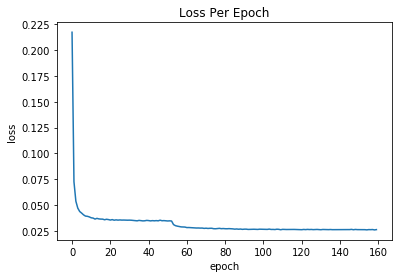

In [23]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

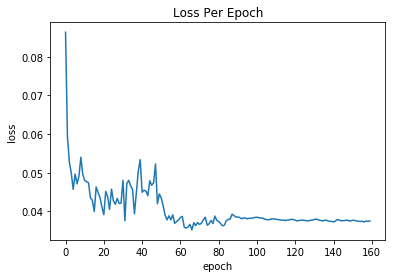

In [24]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [25]:
results['eval_summary']

{'mean_rank': 0.19750057286535577,
 'hits@k': {'1': 0.13, '3': 0.2, '5': 0.24666666666666667, '10': 0.34},
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}

1.

    {'training_set_path': 'D:/uni/master/data/YAGO39K/Train/triple2id.tsv',
     'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv',
     'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv',
     'execution_mode': 'HPO_mode',
     'random_seed': 2,
     'kg_embedding_model_name': 'Region',
     'embedding_dim': 20,
     'normalization_of_entities': 2,
     'init_radius': 5,
     'reg_lambda': 0.02,
     'margin_loss': 0,
     'learning_rate': 5,
     'num_epochs': 30,
     'batch_size': 1024,
     'test_batch_size': 1024,
     'filter_negative_triples': True,
     'maximum_number_of_hpo_iters': 20,
     'preferred_device': 'gpu',
     'pykeen-version': '0.0.26-dev',
     'num_entities': 46100,
     'num_relations': 39}


     {'mean_rank': None,
     'hits@k': None,
     'precision': [0.5817929759704251],
     'recall': [0.7386089563913696],
     'accuracy': [0.6035163257983495],
     'f1_score': 0.6508889335669357}

     30 epochs overfit

2.
   
       {'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 100, 'normalization_of_entities': 2, 'init_radius': 0.5, 'reg_lambda': 0.2, 'margin_loss': 0, 'learning_rate': 5, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}

    MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5531790499390986,), recall=(0.7401082067661822,), accuracy=(0.5707994911439476,), fscore=0.6331344448781575)

    18 epochs


3.

    {'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 10, 'reg_lambda': 0.1, 'margin_loss': 0, 'learning_rate': 2, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}

    MetricResults(mean_rank=None, hits_at_k=None, precision=(0.5531279471864193,), recall=(0.6881559220389805,), accuracy=(0.5657435495971557,), fscore=0.6132977023847561)

    30 epochs not finished



        {'metrics': 'mean_rank', 'training_set_path': 'D:/uni/master/data/FB15K/train.tsv', 'test_set_path': 'D:/uni/master/data/FB15K/valid_150.tsv', 'mapping_path': 'D:/uni/master/data/fb15k/', 'execution_mode': 'HPO_mode', 'random_seed': 5, 'kg_embedding_model_name': 'Region', 'region_type': 'sphere', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 0, 'reg_lambda': 0.01, 'loss_type': 'MRL', 'margin_loss': 0.5, 'neg_factor': 5, 'corrupt_relations': False, 'filter_negative_triples': False, 'es_metric': 'custom', 'learning_rate': 0.1, 'num_epochs': 1000, 'batch_size': 2048, 'test_batch_size': 4096, 'maximum_number_of_hpo_iters': 5, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 14951, 'num_relations': 1345}

# 